# Logistic Regression

## First Part - Necessary Code

In [34]:
# Import
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import colors as c

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [35]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

### Plotting Function

In [36]:
def plot_sigmoid(color, figsize=(10, 6)):
    t = np.linspace(-5, 5, 100)
    z = 1/(1 + np.exp(-t))

    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    plt.plot(t, z, linewidth=2.5, color=color)
    plt.xlabel("t")
    plt.ylabel(r"$\sigma(t)$")
    plt.yticks([0,0.5,1])
    plt.hlines(y =1, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.hlines(y =0.5, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.hlines(y =0, xmin=-5,xmax=5, linestyles="dashed", colors="k")
    plt.axvline(x=0, color='k')
    sns.despine()
    plt.show()

In [37]:
def plot_logarithm(color, minor_ticks=True, zoom=False, figsize=(10,6), ax=None):
    x = np.linspace(0.0001, 10, 400)
    z = np.log(x)
    minor_ticks_array = np.arange(0,11,1)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})

    ax.plot(x, z, linewidth=2.5, color=color)
    ax.set_xlabel("x")
    ax.set_ylabel(r"$ln(x)$")
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(which= "both", alpha=0.1)
    if zoom:
        ax.set_xlim(0,1.2)
        ax.set_ylim(-3,1)
    else:
        ax.set_ylim(-3,3)
        ax.set_xlim(0,10)
    if minor_ticks:
        ax.set_xticks(minor_ticks_array, )
    sns.despine()

In [38]:
def plot_loss(color, predicted_class, figsize=(10, 6), ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        
    p = np.linspace(0.0001, 0.999, 400)
    
    if predicted_class == 1:
        z = -np.log(p)
        y_label = "$-ln(\hat{p})$"
        legend_label = "loss for class 1"
    elif predicted_class == 0:
        z = -np.log(1-p)
        y_label = "$-ln(1-\hat{p})$"
        legend_label = "loss for class 0"
    
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})

    ax.plot(p, z, linewidth=2.5, color= c_light)
    ax.set_ylabel(f"{y_label}")
    ax.set_xlabel(r"$\hat{p}$")
    ax.set_xlim(0,1)
    ax.set_ylim(-0,4)
    sns.despine()
    ax.grid(alpha=0.1)
    ax.legend([legend_label])

### Intuition LogReg

In [39]:
# Data
data = np.array([1,3,3.5,5,6,8,8.5,10,11,30]).reshape(-1, 1)
label = np.array([0,0,0,0,0,1,1,1,1,1])

In [40]:
def train_model(data, label):
    model = LinearRegression()
    model.fit(data, label)
    y_pred = model.predict(data)
    # return x value for y=0.5
    boundary_x = (0.5 - model.intercept_) / model.coef_[0]
    return model, y_pred, boundary_x


def create_example(data, label, figsize=(10,6), regression=False, add_lines=False, outlier=False, compare=False):
    
    model_wo_outlier, y_pred_wo_outlier, boundary_wo_outlier = train_model(data[:-1], label[:-1])
    model_outlier, y_pred_outlier, boundary_outlier = train_model(data, label)
    
    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    
    # decide if outlier should be shown or not
    if outlier:
        plt.scatter(data, label, marker="x", color=c_blue)
    else:
        plt.scatter(data[:-1], label[:-1], marker="x", color=c_blue)
     
    # decide if regression line should be shown
    if regression:
        plt.plot(data[:-1], y_pred_wo_outlier, color=c_dark, label='Linear Regression')
    
    # decide if lines should be shown
    if add_lines:
        plt.hlines(y=0.5, xmin=0, xmax=boundary_wo_outlier, color=c_dark, linestyle='--', linewidth=1)
        plt.vlines(x=boundary_wo_outlier, ymin=-0.2, ymax=1, color=c_dark, linestyle='--', linewidth=1)
    
    # decide if regression lines for with and without oulier should be compared
    if outlier and compare:
        plt.plot(data, y_pred_outlier, color=c_light, label='Linear Regression')
        plt.hlines(y=0.5, xmin=0, xmax=boundary_outlier, color=c_light, linestyle='--', linewidth=1)
        plt.vlines(x=boundary_outlier, ymin=-0.2, ymax=1, color=c_light, linestyle='--', linewidth=1)
    
    
    plt.xlabel('Number of Negative Words')
    plt.ylabel('Sentiment')
    plt.ylim(-0.03,1.03)
    plt.xlim(0,)
    sns.despine()

### Decision Boundary Example

In [41]:
def log_reg_model(x1,x2,y):
    # Convert lists to NumPy arrays
    X = np.array(list(zip(x1, x2)))
    y = np.array(y)
    # Create and fit the logistic regression model
    model = LogisticRegression()
    model.fit(X, y)
    return model


def log_reg_decision_boundary(model):
    # Get the coefficients and intercept of the logistic regression model
    coef = model.coef_[0]
    intercept = model.intercept_
    # Generate x values for decision boundary
    x_decision = np.linspace(0, 4, 100)
    # Calculate the corresponding y-range values for the decision boundary line
    y_decision = -(coef[0] * x_decision + intercept) / coef[1]
    
    return x_decision, y_decision, (intercept[0]/coef[0], coef[0]/coef[0], coef[1]/coef[0])


def decision_boundary_background(model,label_0 = True, label_1 =True):

    # Get the coefficients and intercept of the logistic regression model
    x_min, x_max = 0, 3.5
    y_min, y_max = 0, 3.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if label_0 and label_1:
        cMap = c.ListedColormap([c_light, c_blue])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)
    
    if label_0 and not label_1:
        cMap = c.ListedColormap([c_light,'w'])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)

    if label_1 and not label_0:
        cMap = c.ListedColormap(['w', c_blue])
        plt.pcolormesh(xx, yy, Z, cmap=cMap, alpha=0.2,)

    
def decision_boundary(data_points=True,dec_boundary=True,dec_boundary_background=(True, True), figsize=(6,6)):
    # original data
    neg_words = [0.3, 0.4, 0.6, 0.7, 1, 1.1, 1.3, 1.7, 1.7, 1.1, 1.6, 1.9, 1.8, 2.2, 2, 2.5, 2.25, 2.7, 3, 3.1]
    smileys = [0.5, 1.5, 1.1, 1.8, 1.4, 0.4, 0.9, 0.1, 0.9, 2.4, 2, 1.8, 2.6, 2, 3, 1.7, 1.25, 2.3, 1.75, 2.8]
    class_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    model = log_reg_model(x1=neg_words,x2=smileys,y=class_label)

    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    plt.xlabel('Negative Words')
    plt.ylabel('Sad Smileys')
    # plt.title('Logistic Regression - Decision Boundary')
    plt.ylim(0,3.5)
    plt.xlim(0,3.5)
    plt.yticks([0,1,2,3]) 

    # Map class labels to colors and markers
    color_map = {0: c_light, 1: c_blue}
    marker_map = {0: 'x', 1: 'o'} 



    if data_points:
        for x, y, label in zip(neg_words, smileys, class_label):
            plt.scatter(x, y, color=color_map[label], marker=marker_map[label])
        
    if dec_boundary:
        x_decision, y_decision, _ = log_reg_decision_boundary(model)
        plt.plot(x_decision, y_decision, color=c_dark, linestyle='--', linewidth=4)
    
    # Create a meshgrid
    decision_boundary_background(model,*dec_boundary_background)
            
    sns.despine()

In [42]:
#neg_words = [0.3, 0.4, 0.6, 0.7, 1, 1.1, 1.3, 1.7, 1.7, 1.1, 1.6, 1.9, 1.8, 2.2, 2, 2.5, 2.25, 2.7, 3, 3.1]
#smileys = [0.5, 1.5, 1.1, 1.8, 1.4, 0.4, 0.9, 0.1, 0.9, 2.4, 2, 1.8, 2.6, 2, 3, 1.7, 1.25, 2.3, 1.75, 2.8]
#class_label = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#_,_, b_vector = log_reg_decision_boundary(x1=neg_words, x2=smileys, y=class_label)
#b_vector_rounded = tuple(round(value) for value in b_vector)
#print(f"The fitted parameters for logistic regression are (b vector): {b_vector_rounded}")

# Second Part - Lecture

<div class="slide-title"> 
    
# Logistic Regression
    
</div>

## Recap!

<div class="slide-chapter"> 
    
## Recap!
    
</div>

Notes: What is the difference between regression and classification?

### Confusion Matrix 

<b>Q1:</b> Which cells show the correct predictions

<b>Q2:</b> Now where do we put... TN TP FN FP?

<table class="confusion_matrix">
    <thead>
        <tr>
            <th>&nbsp;</th>
            <th>&nbsp;</th>
            <th colspan=2>Predicted</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>&nbsp;</th>
            <td class="cell-class">&nbsp;</td>
            <td class="cell-class">Negatives</td>
            <td class="cell-class">Positives</td>
        </tr>
        <tr>
            <th rowspan=2>Actual</th>
            <td class="cell-class">Negatives</td>
            <td><span style="color:green"> </span></td>
            <td><span style="color:red"> </span></td>
        </tr>
        <tr>
            <td class="cell-class">Positives</td>  
            <td><span style="color:red"> </span></td>
            <td><span style="color:green"> </span></td>
        </tr> 
    </tbody>   
</table> 


Notes: Fill in blanks with pen after discussing with students  
The nouns (positive/negative) are given according to the prediction (because we usually don't know the reality).  
The adjectives (true/false) are given according to reality (because the trueness can only be stated if we know the truth).

### Confusion Matrix

<b>Q1:</b> Which cells show the correct predictions

<b>Q2:</b> Now where do we put... TN TP FN FP?

<table class="confusion_matrix">
    <thead>
        <tr>
            <th>&nbsp;</th>
            <th>&nbsp;</th>
            <th colspan=2>Predicted</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>&nbsp;</th>
            <td class="cell-class">&nbsp;</td>
            <td class="cell-class">Negatives</td>
            <td class="cell-class">Positives</td>
        </tr>
        <tr>
            <th rowspan=2>Actual</th>
            <td class="cell-class">Negatives</td>
            <td><span style="color:#40B0A6">TN</span></td>
            <td><span style="color:#E1BE6A">FP</span></td>
        </tr>
        <tr>
            <td class="cell-class">Positives</td>  
            <td><span style="color:#E1BE6A">FN</span></td>
            <td><span style="color:#40B0A6">TP</span></td>
        </tr> 
    </tbody>   
</table> 

### Classification metrics

<b>Q3</b>: Which classification metrics do you remember?
<div style="font-size:140%">

| Metric | Value |
|--|--|
| <div style="color: rgba(0, 0, 0, 0)">Accuracy </div> | <div style="color: rgba(0, 0, 0, 0)">${\frac{130}{200}}=0.65$ </div> |
| <div style="color: rgba(0, 0, 0, 0)">Precision </div>| <div style="color: rgba(0, 0, 0, 0)">${\frac{70}{110}}=0.64$ </div>|
| <div style="color: rgba(0, 0, 0, 0)">Recall </div> | <div style="color: rgba(0, 0, 0, 0)">${\frac{70}{100}}=0.7$ </div>|
| <div style="color: rgba(0, 0, 0, 0)">F1-Score </div> | <div style="color: rgba(0, 0, 0, 0)">$2\cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}=\frac{2}{3}$ </div>|
| <div style="color: rgba(0, 0, 0, 0)"> ROC AUC </div> | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |

</div>  



### Classification metrics

<b>Q3</b>: Which classification metrics do you remember?
<div style="font-size:140%">

| Metric | Value |
|--|--|
|Accuracy | <div style="color: rgba(0, 0, 0, 0)">${\frac{130}{200}}=0.65$ </div> |
| Precision | <div style="color: rgba(0, 0, 0, 0)">${\frac{70}{110}}=0.64$ </div>|
| Recall | <div style="color: rgba(0, 0, 0, 0)">${\frac{70}{100}}=0.7$ </div>|
| F1-Score | <div style="color: rgba(0, 0, 0, 0)">$2\cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}=\frac{2}{3}$ </div>|
| ROC AUC | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |

</div>  

<b>Q4</b>: What are the values?

<table class="confusion_matrix">
    <thead>
        <tr>
            <th>&nbsp;</th>
            <th>&nbsp;</th>
            <th colspan=2>Predicted</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>&nbsp;</th>
            <td class="cell-class">&nbsp;</td>
            <td class="cell-class">Negatives</td>
            <td class="cell-class">Positives</td>
        </tr>
        <tr>
            <th rowspan=2>Actual</th>
            <td class="cell-class">Negatives</td>
            <td><span style="color:#40B0A6">60</span></td>
            <td><span style="color:#E1BE6A">40</span></td>
        </tr>
        <tr>
            <td class="cell-class">Positives</td>  
            <td><span style="color:#E1BE6A">30</span></td>
            <td><span style="color:#40B0A6">70</span></td>
        </tr> 
    </tbody>   
</table> 

Accuracy - Rate of corrrect predictions - (TP+TN) /(TP+TN+FP+FN) = # correct predictions / # all predictions  
Precision - How precise does a model predict positives - TP / (TP+FP) = # correct positives / # all positives  
Recall/Sensitivity/TPRate - How many % of the patients will be recalled / How sensitive is the model - TP / (TP+FN) = # correct positives / # actual positive  
F1-Score - Harmonic mean between Precision and Recall - 2x (P\*R) / (P+R)  
ROC AUC - area under ROC curve; parameter: threshold  

### Classification metrics

<b>Q3</b>: Which classification metrics do you remember?
<div style="font-size:140%">

| Metric | Value |
|--|--|
|Accuracy | ${\frac{130}{200}}=0.65$|
| Precision |${\frac{70}{110}}=0.64$ |
| Recall | ${\frac{70}{100}}=0.7$ |
| F1-Score | $2\cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}=\frac{2}{3}$ |
| ROC AUC | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |

</div>  

<b>Q4</b>: What are the values?

<table class="confusion_matrix">
    <thead>
        <tr>
            <th>&nbsp;</th>
            <th>&nbsp;</th>
            <th colspan=2>Predicted</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>&nbsp;</th>
            <td class="cell-class">&nbsp;</td>
            <td class="cell-class">Negatives</td>
            <td class="cell-class">Positives</td>
        </tr>
        <tr>
            <th rowspan=2>Actual</th>
            <td class="cell-class">Negatives</td>
            <td><span style="color:#40B0A6">60</span></td>
            <td><span style="color:#E1BE6A">40</span></td>
        </tr>
        <tr>
            <td class="cell-class">Positives</td>  
            <td><span style="color:#E1BE6A">30</span></td>
            <td><span style="color:#40B0A6">70</span></td>
        </tr> 
    </tbody>   
</table>  

### ROC Curve

<div class="group">
  <div class="text">
      
<b>Q5</b>: What is the threshold?

<b>Q6</b>: When would you change it?
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/ROC_curve_transparent_bg.png" width=600>
  </div>
</div>

Improving the recall, TP / (TP+FN) = missing no patient, by altering the threshold goes along with:  
a worsening (increase) in false alarms, called false positive rate, because there will be more FP.

## Logistic Regression

<div class="slide-chapter"> 

## Logistic Regression
    
</div>

Notes: This is the very basic of nn. get it now pppplease

## Classification


<div class="group">
  <div class="text_70">

  Some examples for classification
* Email: <i>spam vs not spam</i>
* Tumor classification: <i> malignant vs benign </i>
* Bee image: <i> healthy vs not healthy </i>
* Sentiment analysis: <i> happy vs sad </i>
* Text analysis: <i> toxic vs not toxic </i>
* Face recognition: <i>iphone owner or not </i>
* Animal detection: <i> cat vs dog vs monkey vs...</i> (multi class classification)

      
     
  </div>
  <div class="images_30">
    <img src="../images/logistic_regression/img_p9_2.png">
  </div>
</div>

In (binary)-classification we have two possible classes:

$$y\in\{0,1\}$$

* Class 0: the <i>negative</i> class (not spam, malignant, not cat)

* Class 1: the <i>positive</i> class (spam, benign, cat)

Notes: Today we will focus on a binary class problem, but if you understood that it is easy to adapt the knowledge a multiclass problem

### Why classification?

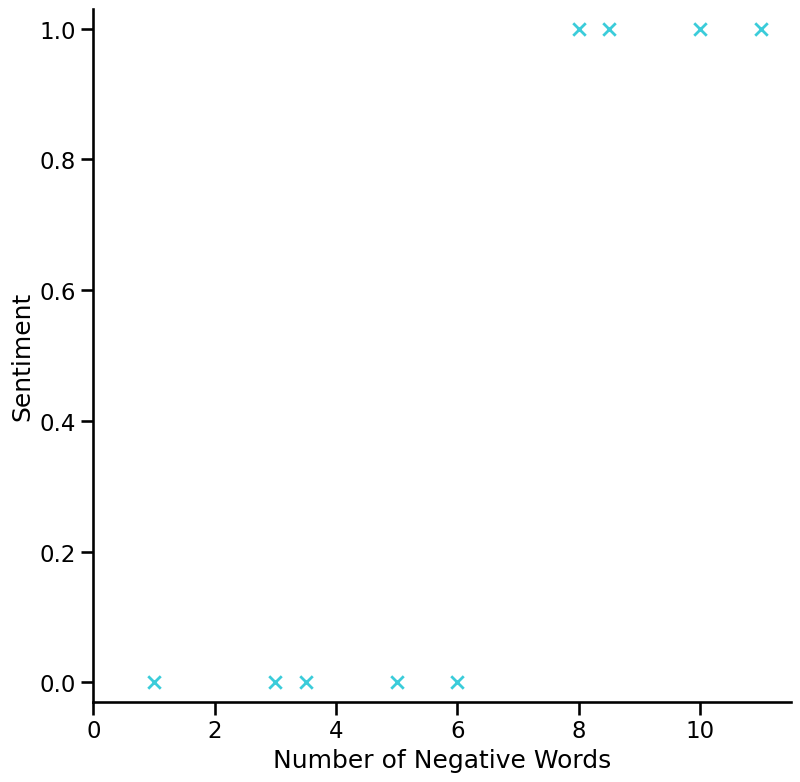

In [43]:
create_example(data, label, figsize=(9,9))

Why do we need another (classification) algorithm if we have linear regression?


### Why classification?

$$h_{b}(x)=b^{T}x$$

$$\text{(or in 1d without matrix notation: }h_b(x) = b_0  + b_1\cdot x)$$

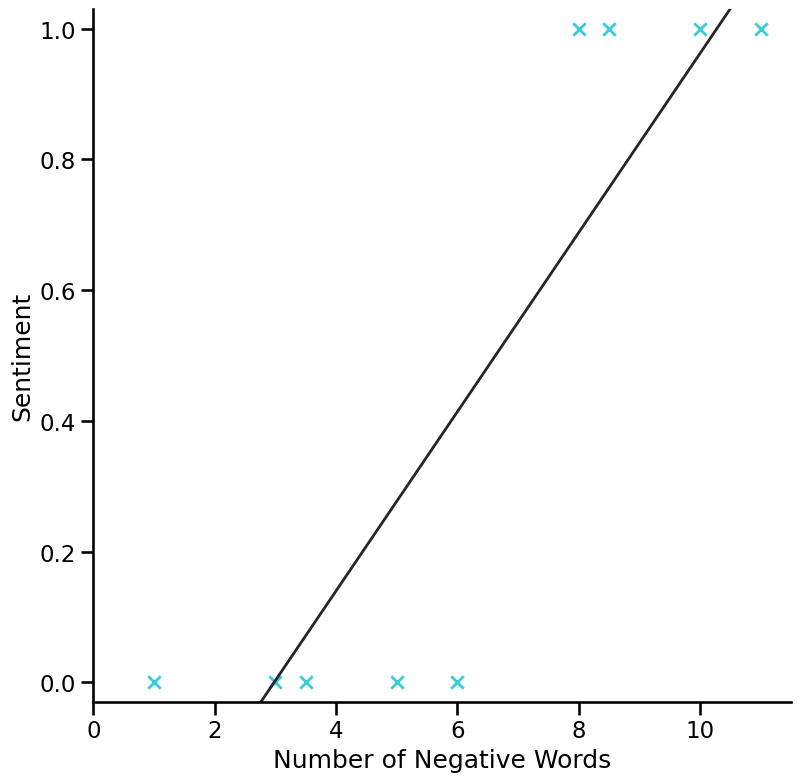

In [44]:
create_example(data, label, regression=True, figsize=(9,9))

Notes: Q1: Does anybody recognise that function or can read it?
Q2: How would you predict with this model?

### Why classification?

<div class="group">
  <div class="text">
      

if $h_{b}(x)\geq0.5$ then predict “y = 1” (→ sad)
 
if $h_{b}(x)<0.5$ then predict “y = 0” (→ not sad)
      
  </div>
  <div class="text">
      
$$h_{b}(x)=b^{T}x$$

</div>
</div>

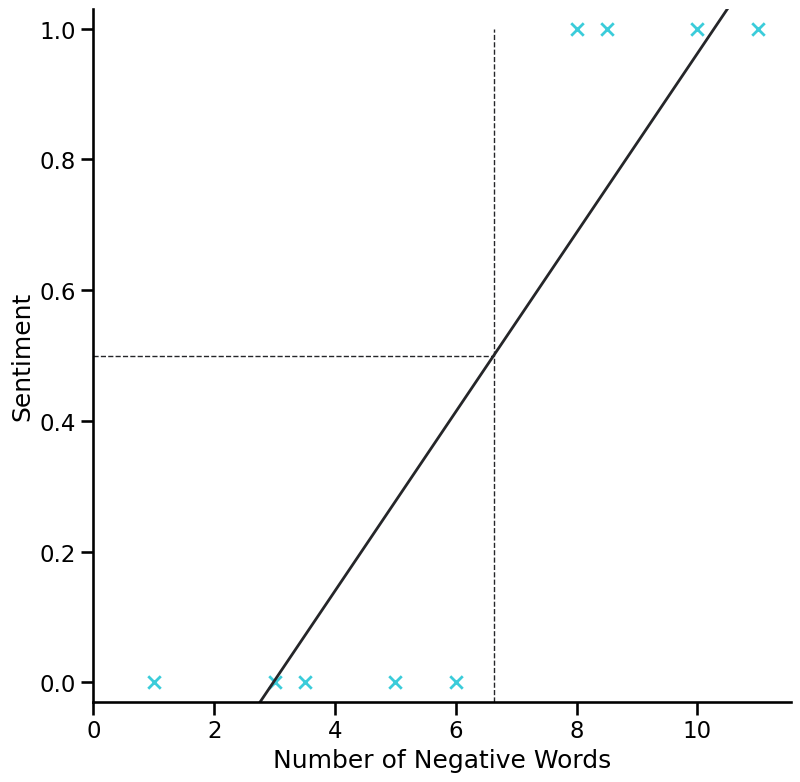

In [45]:
create_example(data, label, regression=True, add_lines=True, figsize=(9, 9))

Notes: Hb - is the hypothesis function

### Why classification?

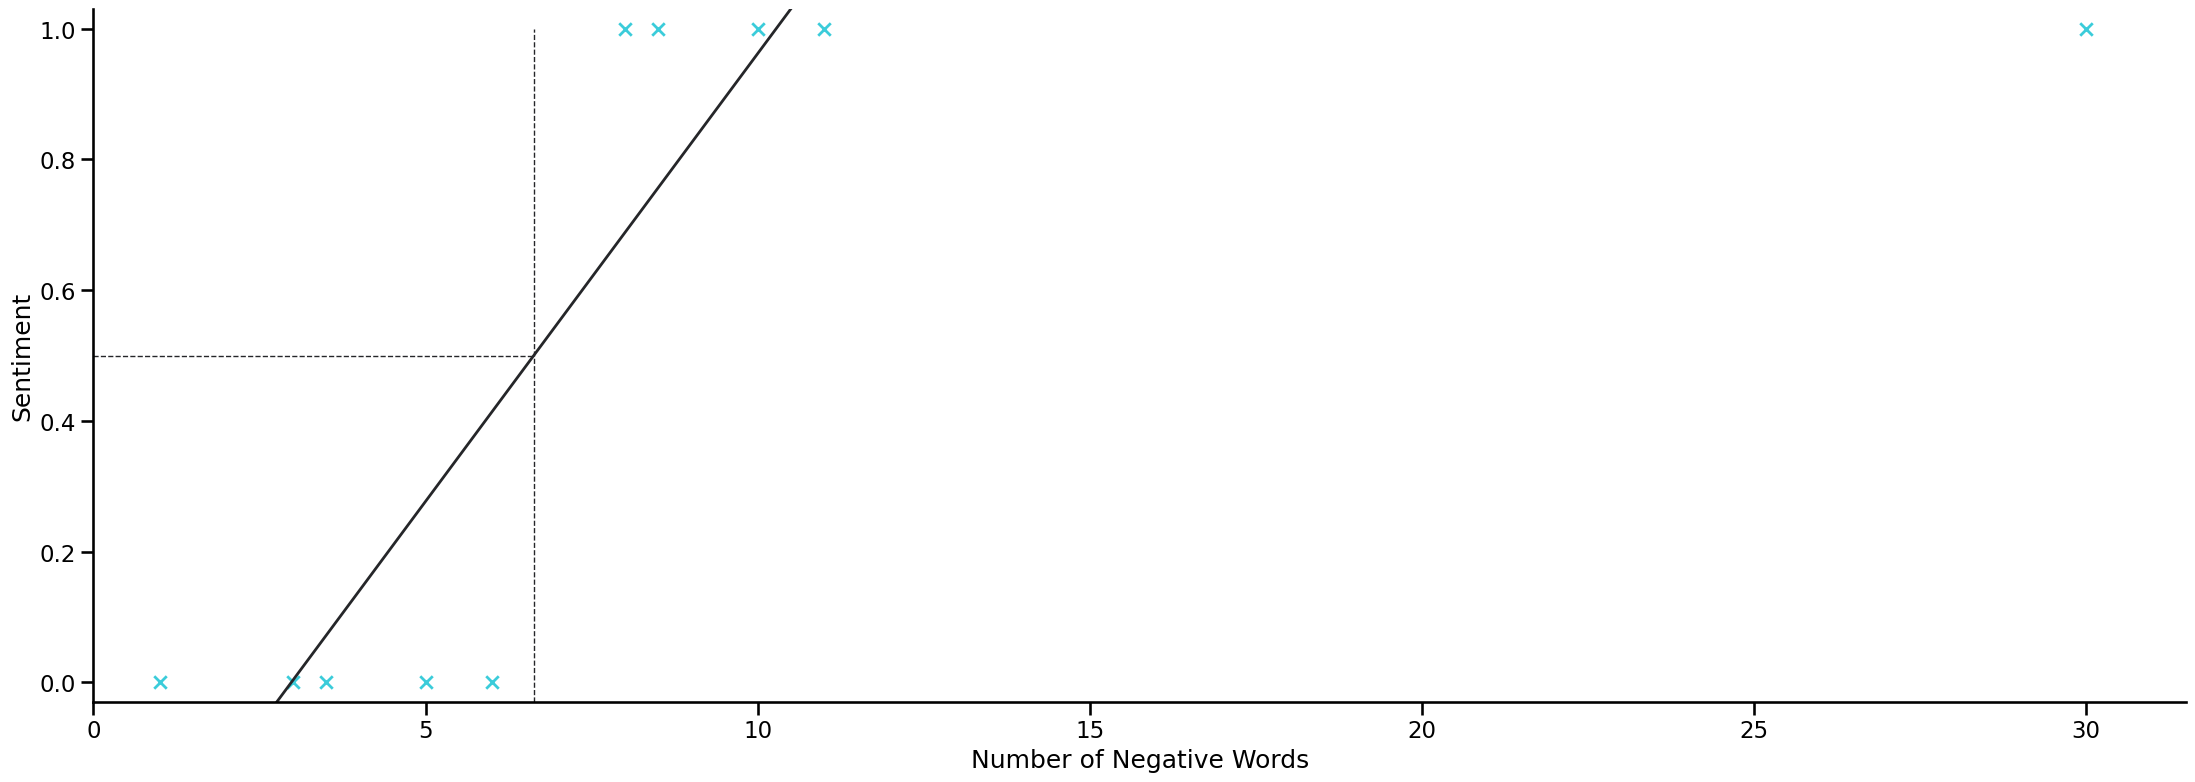

In [46]:
create_example(data, label, regression=True, add_lines=True, outlier=True, figsize=(27, 9))

### Why Classification?

* applying linear regression to a classification problem is usually not a great idea
* first time we got lucky and we got a hypothesis that worked well for the particular example

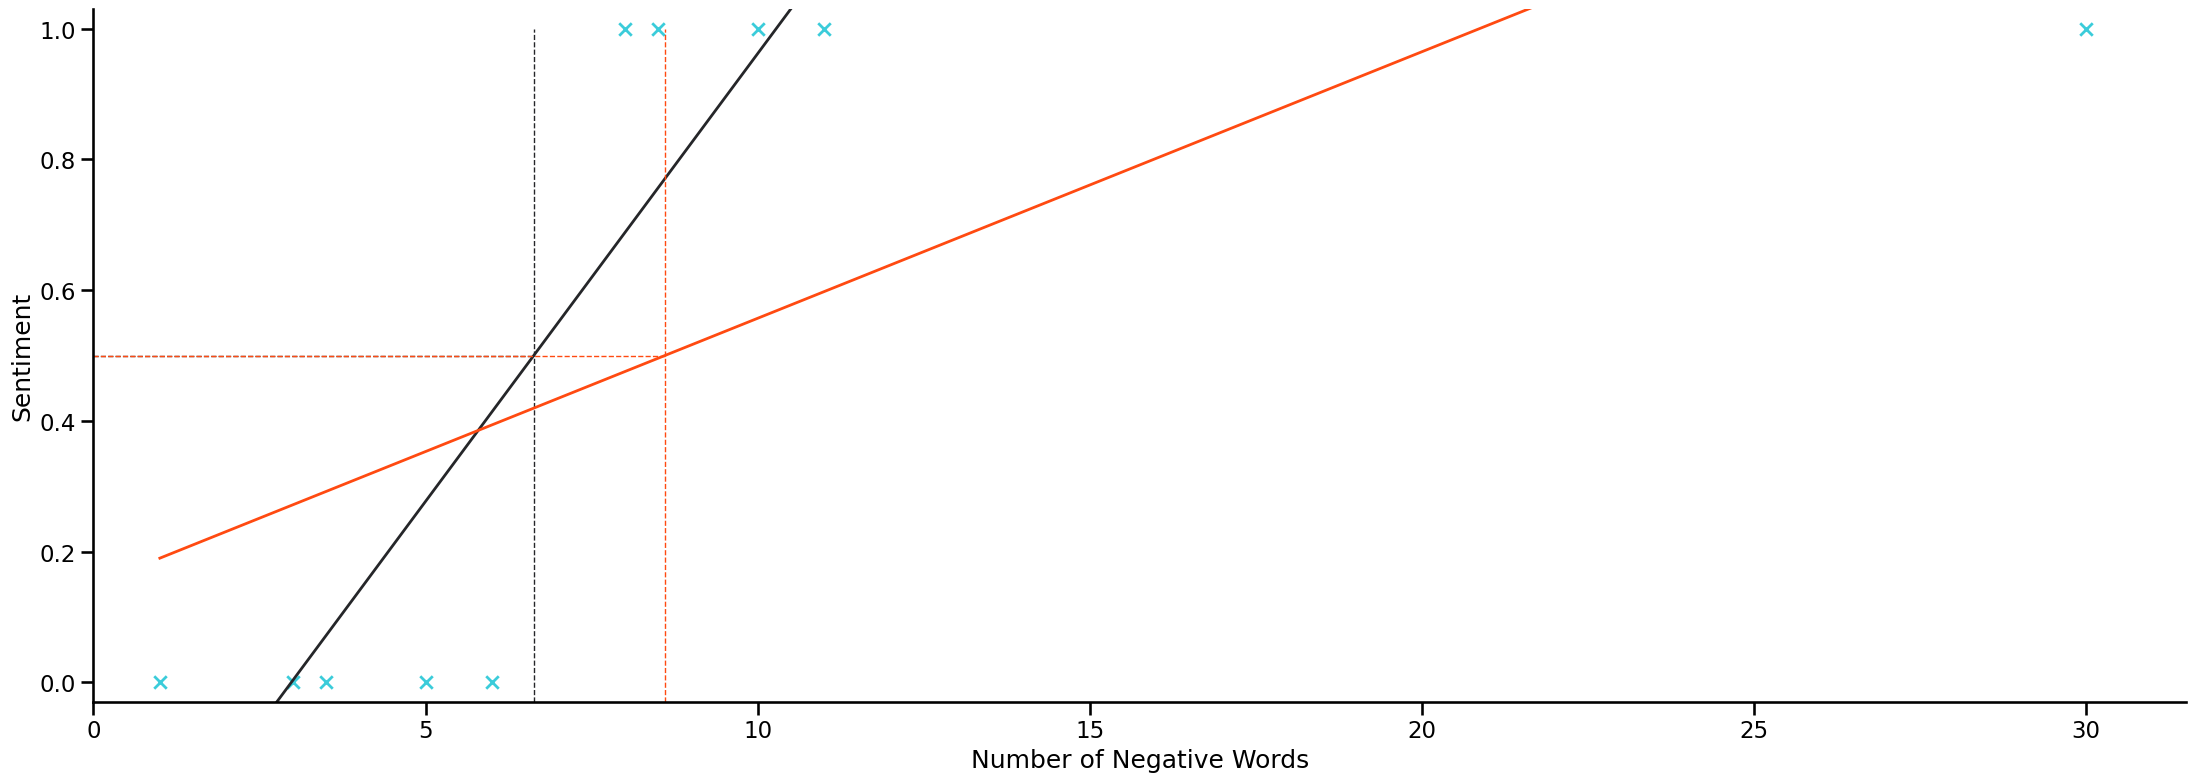

In [47]:
create_example(data, label, regression=True, add_lines=True, outlier=True, compare=True, figsize=(27, 9))

### Another problem with classification with linear regression

* y can be 1 or 0 (or any other labels)  $y\in\{0,1\}$

* but the hypothesis $h_{b}(x)$ can be larger than 1 or smaller than 0 even when all the training data was with 0 and 1

$$\begin{align}
h_{b}(x)&=b^{T}x\\[8pt]
h_{b}(x)&\in\mathbb{R}
\end{align}$$

## Logistic Regression Model

Classification hypothesis:

$$0\leq h_{b}(x) \leq 1$$



Linear regression hypothesis: 

$$h_{b}(x)=b^{T}x$$



Logistic regression hypothesis: 

$$h_{b}(x)=\sigma(b^{T}x)$$





Sigmoid function aka. logistic function:  

$$\sigma(t)=\frac{1}{1+e^{-t}}$$


### The Logistic function


<div class="group">

Lets discuss some properties of the sigmoid function:

<div class="text">
     
* Sigmoid function makes values fit into (0,1)
      <br>
      <br>
* The sigmoid asymptotes to 0 when t goes to minus infinity
      <br>
      <br>
* The sigmoid asymptotes to 1 when t goes to infinity
      <br>
      <br>
* All its values lie within (0,1)
      
  </div>
  <div class="text" style="font-size: 115%">
 
$$\begin{align}
\sigma(t)&=\frac{1}{1+e^{-t}}\\[4pt]
\operatorname*{lim}_{t\rightarrow-\infty}\sigma(t)&=0\\[4pt]
\operatorname*{lim}_{t\rightarrow\infty}\sigma(t)&=1 \\[4pt]
\sigma(t)&\in\{0,1\}\\
\end{align}$$
  </div>

</div>

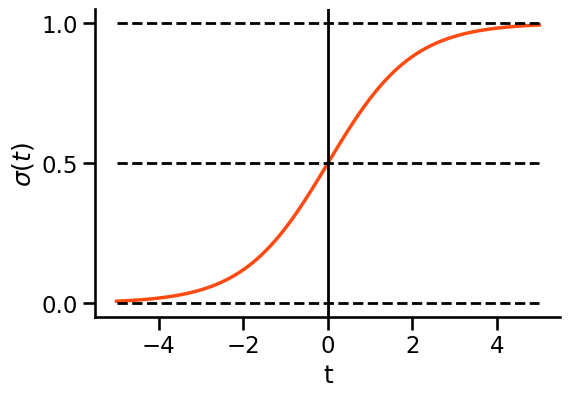

In [48]:
plot_sigmoid(c_light, figsize=(6,4))

### From logistic function to logistic regression
    
<div class="group">
  <div class="text_70">
      
* Sigmoid function makes values fit into (0,1)

* we then need to pick the parameters b
    * t is equivalent to $b^Tx$
      
  </div>
  <div class="text_30" style="font-size: 115%">

$$\begin{align}
\sigma(t)&=\frac{1}{1+e^{-t}}\\[8pt]
h_{b}(x)&=\frac{1}{1+e^{-b^Tx}}
\end{align}$$
  </div>
</div>    

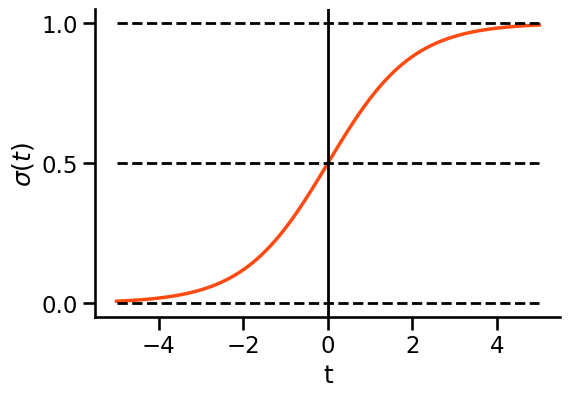

In [49]:
plot_sigmoid(c_light, figsize=(6,4))

### Explore the sigmoid function  
$$\sigma(x)=\frac{1}{1+e^{-(b_0 + b_1 \cdot x)}}$$
Please take this code and evaluate the infuence of $b_0$ and $b_1$.

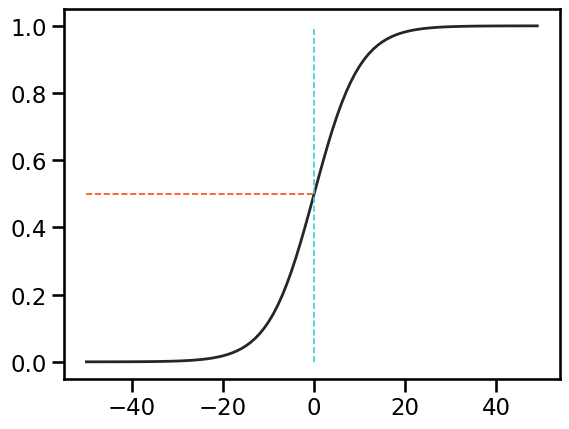

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# create the sigmoid function
def sigmoid_function(t):
    '''Calculates p for given t'''
    p = 1/(1+np.exp(-t))
    return p

# create the logit function
def logit_function(x, b0, b1):
    '''Caluculates the border'''
    t = b0 + b1*x
    return t

b0 = 0
b1 = 0.2

x = np.arange(-50, 50, 1)
t = logit_function(x, b0, b1)
p = sigmoid_function(t)

plt.plot(x,p, color=c_dark)
plt.vlines(x=-b0/b1,ymin=0, ymax=1,color=c_blue,linestyle='--', linewidth=1.2)
plt.hlines(y=0.5,xmin=-50, xmax=-b0/b1,color=c_light, linestyle='--', linewidth=1.2)
plt.show()

### Explore the sigmoid function  

Result
- $p(t(x))$ (the result of the sigmoid function) or in short $p(x)$ is mainly only 0 or 1 (about)
- $b_0$ shifts the sigmoid function to the left and right
- Larger $b_1$ sharpens the sigmoid function.
- Proper fractions of $b_1$ smoothens the sigmoid function.
- Negative $b_1$ flips the sigmoid function.

Assuming that $b_0$ and $b_1$ are known, we can input any $x$ (a feature of our machine learning problem), and our sigmoid function tells us whether the observation belongs to category 0 or 1.  

The only requirement is to customize the model parameters $b_0$ and $b_1$ to our needs / input data so that it can be used to discrimitate/binarize/classify any numerical feature $x$. 

### Interpretation of the Hypothesis

$h_b(x)$ is the probability that y = 1 on input x

Example:

$$
x = \begin{bmatrix} x_0 \\ x_1\end{bmatrix} = \begin{bmatrix} 1 \\ \text{#negWords}\end{bmatrix}
$$

$h_{b}(x)=0.8$

The sentence has a 80% probability of being sad.
<i>The probability of y=1 given the feature vector x is 80%</i>

Notation:

$h_{b}(x)=p(y=1\mid x;b)$

Notes: I’m going to count on my hypothesis to give me estimates of the probability that y = 1.

### Conditional probability  

The syntax $p(y=1\mid x;b)$ denotes a so called *conditional probability*.  


- The $p$ is called probability function or just *probability*.  
- $y = 1$ is the event that we are interested in.  
- The  $ | $  is pronounced "given", which refers to the following parameters ...
- ... $x; b$ which describe the conditions under which we are considering the probability.  


In this example we want to know the probability that y is 1 (that y belongs to class 1) assuming a certain number of negative words $(x)$ and underlying the given weights for $b$.

What is: 

$p(y=0\mid x;b)$

### Interpretation of the Hypothesis

This is a classification problem, so <b>y has to be 0 or 1</b>
<br>
<br>
<br>
<div class="group" style="font-size: 130%">
    
$$\begin{align}
&\underbrace{p(y=1\mid x;b)}_{\color{red}{\text{sad}}}+ \underbrace{p(y=0\mid x;b)}_{\color{green}{\text{not sad (happy)}}} = 1\\[12pt]
h_{b}(x)=&\underbrace{p(y=1\mid x;b)}_{\color{red}{\text{sad}}} =  1-\underbrace{p(y=0\mid x;b)}_{\color{green}{\text{not sad (happy)}}}
\end{align}$$
    
</div>

Notes: “From cristoph bishop p 205: the posterior propability of class c1 can be written as a logistic sigmoid acting on a linear function of the feature vector (x).”

## The Decision Boundary

Defining the decision boundary / threshold
<div group="group">
    <div class="text_70">
    
* we could do 0.5 as the threshold (default in sklearn implementation)
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.
    
    </div>
    <div class="images_30">

$$ \hat{y}= \begin{cases} 1 & \text{if } \hat{p} \ge 0.5 \\ 0 & \text{if } \hat{p} < 0.5 \ \end{cases} $$

**For what t is the sigmoid greater than 0.5?**
   </div>
</div>    

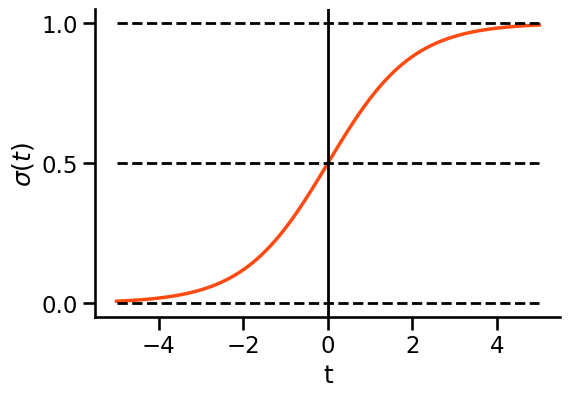

In [51]:
plot_sigmoid(c_light, figsize=(6,4))

### The Decision Boundary

Defining the decision boundary / threshold
<div group="group">
    <div class="text_70">
    
* we could do 0.5 as the threshold (default in sklearn implementation)
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.
    
    </div>
    <div class="text_30">

$$ \begin{array}{c}{{\hat{p}\:=\:\sigma\bigl(b^{T}\,x\bigr)\:\ge\:0.5}}\\ {{b^{T}\:x\geq0}}\end{array}$$

**When do we predict y = 0?**
   </div>
</div>  

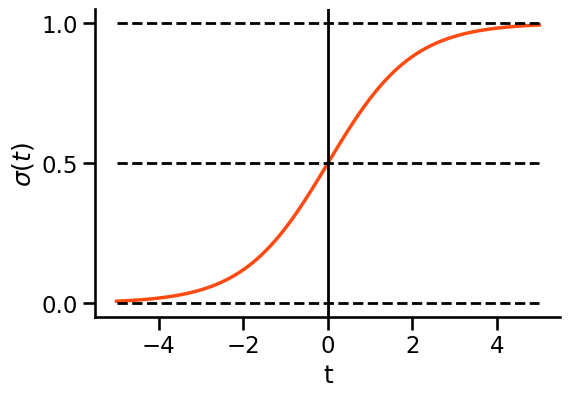

In [52]:
plot_sigmoid(c_light, figsize=(6,4))

## Classification

Now classification will be based on probabilities:

<div group="text">
    <div class="text_70">
   
* 0.5 is the threshold
* If the probability is bigger than or equal to 0.5 it is classified as 1, else as 0.
    
    </div>
    <div class="images_30">

$$ \hat{y}= \begin{cases} 1 & \text{if } \hat{p} \ge 0.5 \\ 0 & \text{if } \hat{p} < 0.5 \ \end{cases} $$

**Why 0.5? Good question!**
   </div>
</div>  

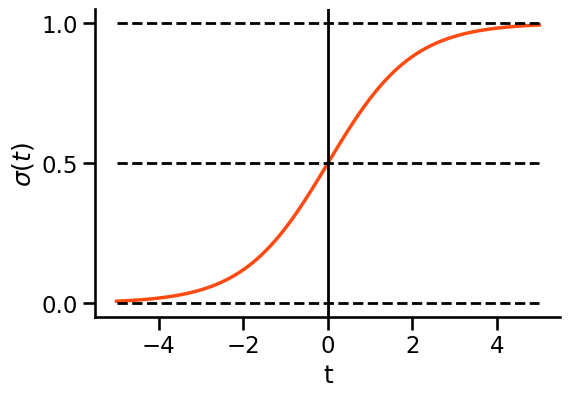

In [53]:
plot_sigmoid(c_light, figsize=(6,4))

Notes: the answer is… business case! check the next slide

## The Logistic Function
<div class="group">
  <div class="text">
      
Remember: The threshold corresponds to your
business problem!
      
  </div>
  <div class="images">
    <img src="../images/logistic_regression/ROC_curve_transparent_bg.png" width=600>
  </div>
</div>

e.g. decrease # missed (potential) patients by decreasing the threshold (drawback: many healthy get paniced)

<div class="slide-chapter"> 

## Hands on. Example time!
    
</div>

## Hands on. Example time!

### Decision Boundary Example - Let’s use Logistic regression!

* We have some texts to classify as **sad** (class 1) or **happy** (class 0)
* Our features are:
    * x1: number of negative words (e.g. "Today was a dull, exhausting and tiring one. 😞", x1 = 3)
    * x2: number of sad smileys (e.g. "Today was a dull, exhausting and tiring one. 😞", x2 = 1)

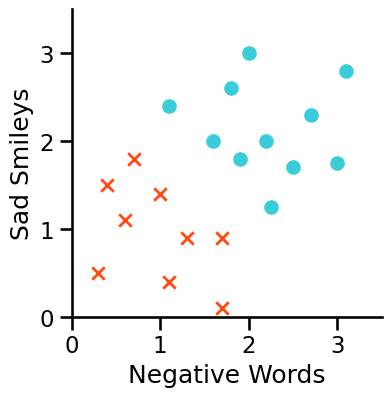

In [54]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False), figsize=(4, 4))

This figure does **not** show the response this time but two features!

### Decision Boundary Example


<div group="text">
    <div class="text">
    
$\hat{p} = \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x)$
    </div>
    <div class="text">

$x_0=1$   
        
   </div>
</div>

$b^{T} x=\begin{bmatrix}b_0 & b_1 & b_2 \end{bmatrix}\cdot\begin{bmatrix}x_0\\x_1\\x_2 \end{bmatrix}=\,b_{0}\cdot x_{0}\,+\,b_{1}\cdot x_{1}\,+\,b_{2}\cdot\,x_{2}$


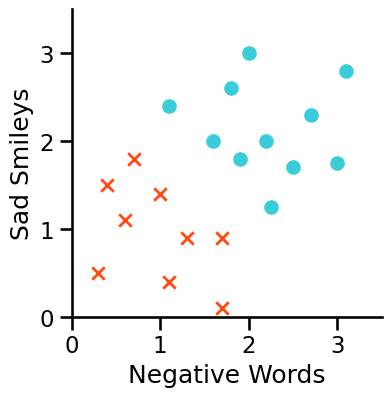

In [55]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False),figsize=(4, 4))

$x$ is one observation. The index refers to different features:  
$x_0$ belongs to the bias and is 1 (so that $b_0$ is the intercept).   
$x_1$ and $x_2$ are the # of neg. words and smileys, resp.  


### Decision Boundary Example


<div group="text">
    <div class="text">
    
$\hat{p} = \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x)$
    </div>
    <div class="text">

$b=\left[\begin{array}{c}{{-3\ }}\\ {{1}}\\ {{1}}\end{array}\right]$
        
   </div>
</div>

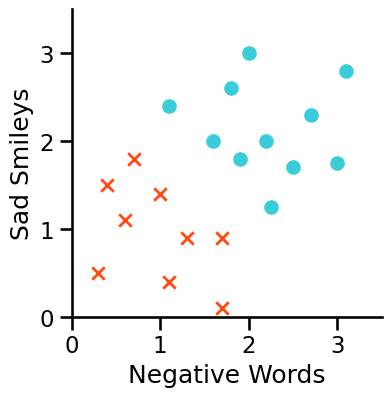

In [56]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False), figsize=(4, 4))

### Decision Boundary Example

<div group="text">
    <div class="text">
    
$\hat{p}= \sigma(b_0+ b_1 x_1 +b_2 x_2) = \sigma(b^T x)$
        
$\hat{p}= \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$
    </div>
    <div class="text">

$b=\left[\begin{array}{c}{{-3\ }}\\ {{1}}\\ {{1}}\end{array}\right]$
        
   </div>
</div>

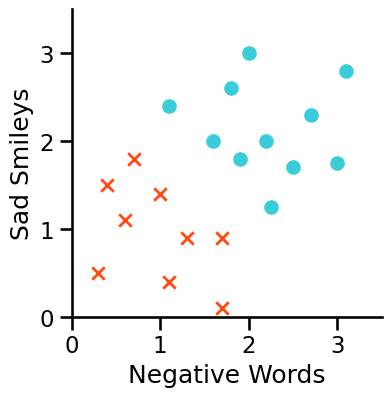

In [57]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False), figsize=(4, 4))

### Decision Boundary Example


$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x) = \frac{1}{1+e^{b_0+b_1\cdot x_1 + b_2 \cdot x_2}}$

We predict class 1 if

$\hat{p}\geq0.5 \text{ that means } b^T x\geq0$ (the exponent of $e$)


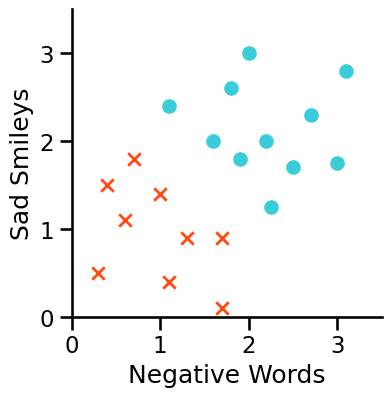

In [58]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False), figsize=(4, 4))

### Decision Boundary Example

<div group="text">
    <div class="text">
    
$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$


We predict “y = 1” when:

$\hat{p}\geq0.5 \text{ when } b^T x\geq0$ 
    </div>
    <div class="text">

$$\begin{align}
-3+x_1+x_2&\geq0 \\
x_1+x_2&\geq3\end{align}$$

        
   </div>
</div>

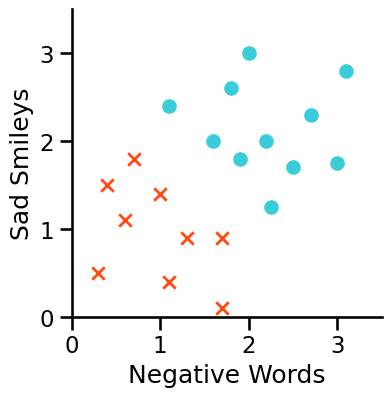

In [59]:
decision_boundary(dec_boundary=False, dec_boundary_background=(False,False), figsize=(4, 4))

### Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$

We predict “y = 1” when:

<span class="color-plot_blue">${x_1+x_2\geq3}$</span>

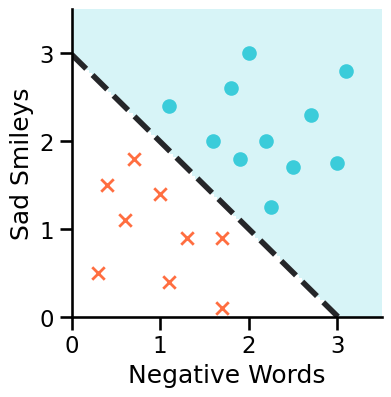

In [60]:
decision_boundary(dec_boundary=True, dec_boundary_background=(False,True), figsize=(4, 4))

### Decision Boundary Example

$\hat{p} = \sigma(-3+ x_1 +x_2) = \sigma(b^T x)$

<div group="text">
    <div class="text">
    
We predict “y = 1” when:

<span class="color-plot_blue">${x_1+x_2\geq3}$</span>
    </div>
    <div class="text">
        
We predict “y = 0” when:

<span class="color-plot_light">${x_1+x_2<3}$</span>

        
   </div>
</div>

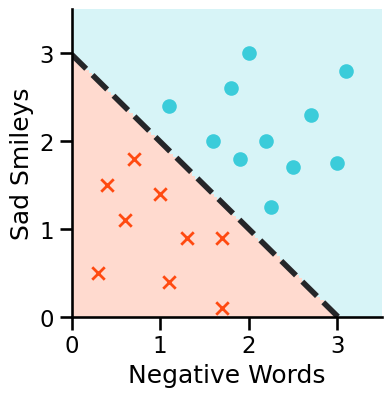

In [61]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True), figsize=(4, 4))

### Decision Boundary Example

<div group="text">
    <div class="text">
        
We predict “y = 1” when:

<span class="color-plot_blue">${x_1+x_2\geq3}$</span>
        
We predict “y = 0” when:

<span class="color-plot_light">${x_1+x_2<3}$</span>
 </div>
    <div class="text">
        
**Decision Boundary:**

$$x_1+x_2=3$$
$$x_2=3-x_1$$

   </div>
</div>



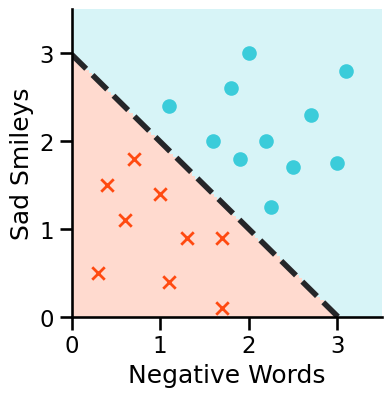

In [62]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True), figsize=(4, 4))

Notes: Ask students: What if we move the threshold? revisit slide 35 for this  
Draw the two areas for $\sigma = 0 \text{ and } 1$ into the figure.  
"Rotate" the view looking perpendicular so that the height becomes the ordinate.  
&rarr; The boundary moves parallel.

### Decision Boundary


The decision boundary is a property of the hypothesis and not of the data.

We fit the model to find the parameters *b* and then we can get the decision boundary based on *b*.


Spoiler alert: if you use higher order polynomial features you get a non-linear decision boundary.

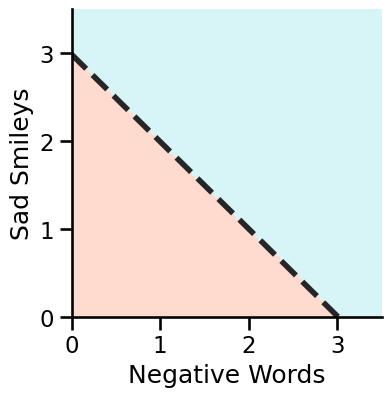

In [63]:
decision_boundary(dec_boundary=True, dec_boundary_background=(True,True), data_points=False, figsize=(4, 4))

Notes: Google together for non-linear decision boundaries check what happens with “the line”, ie. the decision boundary when we play with the threshold (slide 35)

<div class="slide-chapter-split">
    <div class="title-chapter">No more mystical stuff. Let's train!</div>
    <div class="image-container">
        <img src="../images/logistic_regression/img_p39_1.png" alt="sad ghost">
    </div>
</div>

## The Cost Function

Training set: $\{(x^1, y^1), (x^2, y^2), ... (x^n, y^n)\}$

$$ x\,=\,\left[{\begin{array}{c}{x_{0}}\\ {x_{1}}\\ {\vdots}\\ {x_{m}}\end{array}}\right],x_{0}\,=\,1,\,y\,\in\,\{0,1\}$$



How do we chose the right parameters *b*?

Fitting the parameter *b* to the data.

$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$

The top numbers are no exponents but refer to the observation number here.  


### The Cost Function

For logistic regression the **log loss function** LLF (also referred to as **binary cross entropy**) is used:  
$$LLF = -\frac{1}{n}\sum_{i=0}^n\Bigg[ \Bigg(y_i \ln(\hat{p}(x_i))\Bigg) + \Bigg((1-y_i) \ln(1-\hat{p}(x_i))\Bigg)\Bigg]\quad$$  

with $n$ being the number of observations,  
$y_i$ being the real observations (0 or 1)  
and $\hat{p}(x_i)$ being the predictions, between 0 and 1  


| $y_i$ (real value) | $\hat{p}(x_i)$ (prediction) | val in [] |
| :- | :- | :- |
| 0 | $ \sim 0$ | $ \sim 0$
| 0 | $\neq 0$ | large
| 1 | $ \sim 1$ | $ \sim 0$ 
| 1 | $\neq 1$ | large

&rarr; The further the prediction is from the real value, the larger the LLF  
_vice versa_: **The smaller the loss, the better the prediction.**  


### The Cost Function

<div class="group">
  <div class="text_70">
      
Why don't we use the cost function we know from linear regression?
      
$$ \mathrm{min}\ J(b)\ =\ \sum(y_{i}\ - \hat{y})^{2}$$  
      
$$ \text{or the estimated probabilities:}$$  

$$\mathrm{min}\ J(b)={\textstyle{\frac{1}{2n}}}\sum(y-\hat{p})^{2}$$


This would lead to a non-convex function which is hard to optimize. (Remember: Gradient Descent)
      
  </div>
  <div class="images_30">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Convex_vs._Not-convex.jpg" width =400>
  </div>
</div>

### The Cost Function

<div class="group">
  <div class="text_70">
      
The linear regression cost function (remember OLS).
      
$$ J(b)={\textstyle{\frac{1}{2n}}}\sum(y\,-\,\hat{p})^{2}$$

Logistic regression hypothesis:
      
$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$



This would though lead to a non-convex function which is hard to optimize. The usual way to optimize is to find the global minimum.
      
  </div>
  <div class="images_30">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/Convex_vs._Not-convex.jpg" width =400>
  </div>
</div>

Is the equation correct? y are the classes, 0 or 1, while $\hat{p}$ is the probability that an observation is class 1.

Notes: 
  
Non-convex is not non-optimizable but hard to optimize (NNs have non-convex cost functions but SGD can be applied. the global minimum is then sometimes reachable, most often suffices however small sphere around a local one) Also: Since y^ is always between 0 and 1, so would be the squared error (-> higher precision needed)

### The Cost Function

Logistic regression hypothesis:

$$ \hat{p}=\frac{1}{1+e^{-b^{T}x}}$$

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

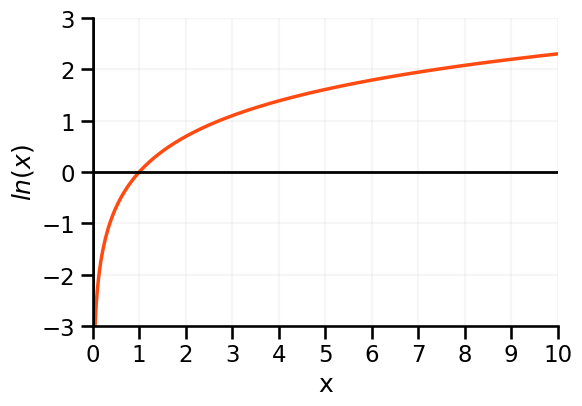

In [64]:
plot_logarithm(c_light, figsize=(6,4))

Notes: the plot shows the ln function. We need to flip it, which we can achieve while multiplying with a minus

### Loss based on logs of probabilities

For instances belonging to class 1 → Loss is the negative log of $\hat{p}(y=1)$

    → Probability is close to zero? Loss is high!

    → Probability is close to one? Loss is low!


$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

For (correct) probabilities of 0 / 1, the loss would be zero.

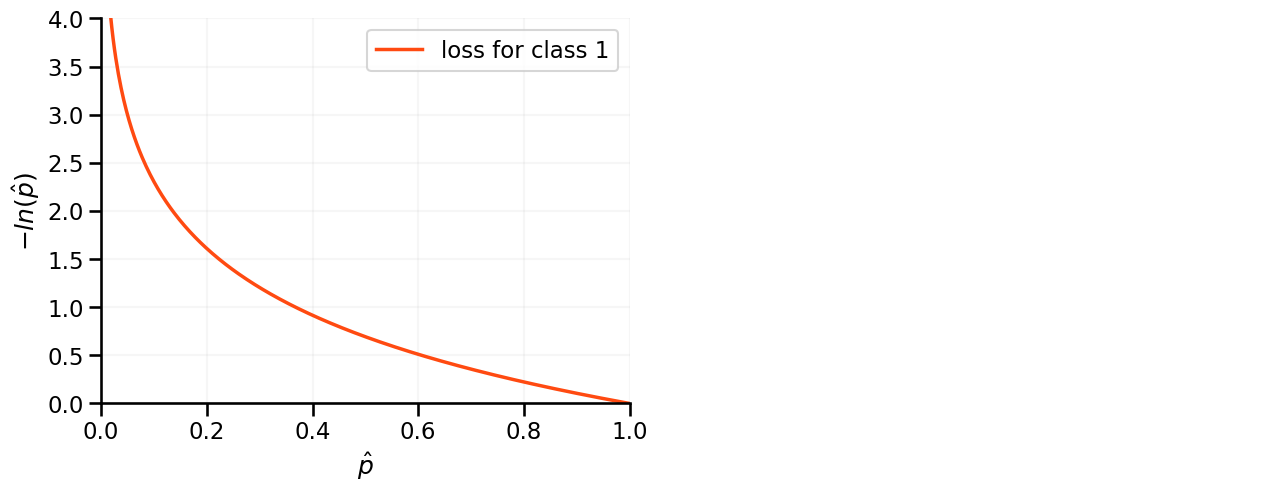

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_loss(c_light, 1, ax=ax[0])
ax[1].axis('off');

### Loss based on logs of probabilities

For instances belonging to class 0
→  Loss is the negative log of $1-\hat{p}(y=1)$

    → Probability is close to zero? Loss is low!

    → Probability is close to one? Loss is high!

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$

For (correct) probabilities of 0 / 1, the loss would be zero.


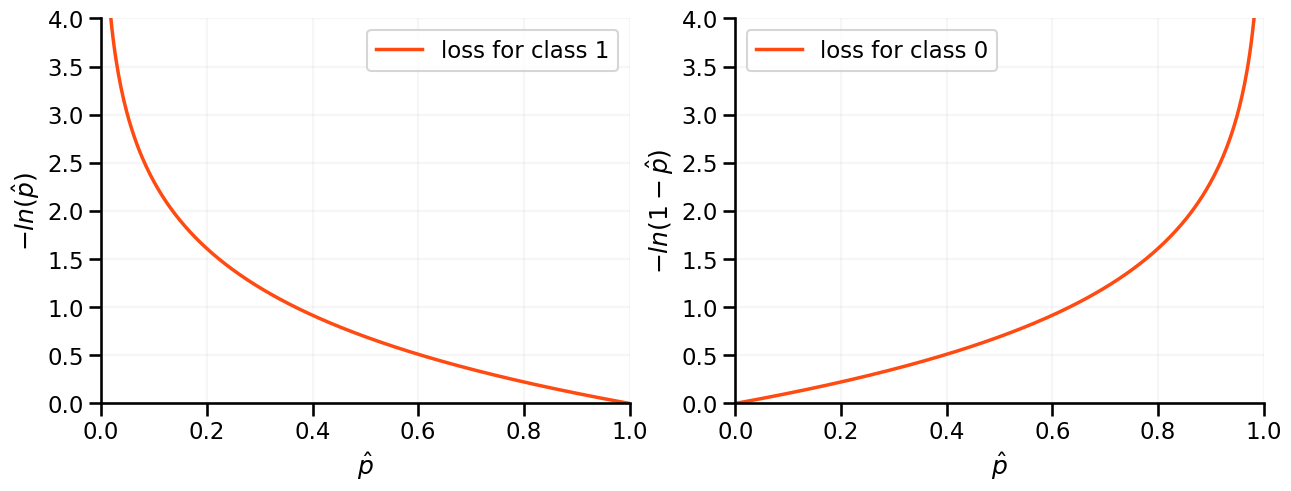

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_loss(c_light, 1, ax=ax[0])
plot_loss(c_light, 0, ax=ax[1])

Notes: For (correct) probabilities of 0 / 1, the loss would be zero 
The loss function is by design like this: penalize wrong predictions hard, and quite right predictions low


### Now, just add it all up

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$
<br>
<br>
Because y is always 0 or 1 we can write this:

$$
Loss(\hat{p},y)=y\cdot\big(-\ln{(\hat{p})}\big)+(1-y)\cdot\big(-\ln{(1-\hat{p})}\big)
$$

Notes: Can somebody explain why are both the same?

$$
Loss(\hat{p},y)= \underbrace{y\cdot\big(-\ln{(\hat{p})}\big)}_{\color{grey}{\text{“disabled” for }}y=0}+\underbrace{(1-y)\cdot\big(-\ln{(1-\hat{p})}\big)}_{\color{grey}{\text{“disabled” for }}y=1}
$$

### Now, just add it all up

$$
Loss(\hat{p},y)=\begin{cases}
-\ln{(\hat{p})} &\text{if } y=1 \\
-\ln{(1-\hat{p})} &\text{if } y=0
\end{cases}
$$
<br>
<br>
Because y is always 0 or 1 we can write this:

$$\begin{align}
Loss(\hat{p},y) &= y\cdot\big(-\ln{(\hat{p})}\big)+(1-y)\cdot\big(-\ln{(1-\hat{p})}\big) \\[18pt]
Loss(\hat{p},y) &= -\big[y\ln{(\hat{p})} + (1-y)\ln{(1-\hat{p})}\big]
\end{align}$$

<br>
<br>
This loss function (binary cross-entropy) can be directly obtained from MLE (maximum likelihood estimation)


### From loss to cost

Now, let’s average the Loss function over all observations:

$$\begin{align}
Loss(\hat{p},y) &= -\big[y\ln{(\hat{p})} + (1-y)\ln{(1-\hat{p})}\big] \\[16pt]
J(b) &= -\frac{1}{n}\sum_{i=1}^n[y_i\ln\left(\hat{p}_i\right)\ +\ (1-y_i)\ln\left(1-\hat{p}_i\right)\big]
\end{align}$$

Now we can fit our parameters *b* to our data:
* Find *b* that **minimizes the cost function J(b)**.
* To minimize the cost function we use **gradient descent**!


### Minimizing J - find $b$
<br>
<div class="group">
    <div class="text_70">

* There is no closed form solution as the Normal Equation ($b = (X^TX)^{-1}X^Ty$)  for linear regression. 
* So instead we get the partial derivatives and start the **gradient descent**!

$$\frac{\partial}{\partial b_{j}}J(b)=\frac{1}{n}\sum_{i=1}^{n}\Bigl(\sigma\Bigl(b^{T}x_{i}\Bigr)-y_{i}\Bigr)x_{i,j}$$        
    </div>
    <div class="images_30">               
<center>
    <img src="../images/logistic_regression/img_p49_1.png" width=500>
</center>
    </div>
</div>

## Conclusion

<div class="group">
  <div class="text_70">
      
Training the model ~ finding *b* that minimizes *J* ~ finding the shape of the decision boundary.

Changing the classification **threshold** from 0.5 (default) ~ changing the position of the decision boundary (but
not the shape).
      
  </div>
  <div class="images_30">
    <img src="../images/logistic_regression/decision_boundary_circles_transparent_bg.png" width=300>
  </div>
</div>

### Multi class problems

<div class="group">
  <div class="text_70">
      
How can more than two different classes be predicted?
      
This is often done using OvR (one versus rest).  
      
      
If there are 3 classes, 3 classification runs were performed:  
- class 0 vs. classes 1 $\cup$ 2
- class 1 vs. classes 0 $\cup$ 2
- class 2 vs. classes 0 $\cup$ 1      
      
      
The class with the highest probability is used for final prediction.
      
    
  </div>
  <div class="images_30">
    <img src="../images/logistic_regression/multiclass_classification.png" width =600>
  </div>
</div>

## Resources

* [Hands on Machine Learning](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
* [Machine Learning course with Andrew Ng Complex decision boundary](https://www.coursera.org/learn/machine-learning)
* [https://www.researchgate.net/figure/Classification-results-of-SVC-with-the-nonlinear-decision-boundary_fig1_25557](https://www.researchgate.net/figure/Classification-results-of-SVC-with-the-nonlinear-decision-boundary_fig1_255572951)


